Загрузка и объединение данных. 
Читаем все файлы из папки и объединяем в один датасет, чтобы работать с полной информацией

In [181]:
import os
import pandas as pd

def load_all_data(root_dir):
    all_dfs = []
    found_files = []
    
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(root, file)
            if file.endswith(('.csv', '.xlsx', '.parquet')):
                found_files.append(file)
                if file.endswith('.csv'):
                    temp_df = pd.read_csv(file_path)
                elif file.endswith('.xlsx'):
                    temp_df = pd.read_excel(file_path)
                elif file.endswith('.parquet'):
                    temp_df = pd.read_parquet(file_path)
                all_dfs.append(temp_df)
    
    combined_df = pd.concat(all_dfs, ignore_index=True)
    return combined_df, found_files

df_train, files_list = load_all_data('train_data')

print(f"Всего файлов найдено и прочитано: {len(files_list)}")
print(f"Размер итогового датасета: {df_train.shape}")
print(f"Распределение целевой:\n{df_train['Увольнение'].value_counts(normalize=True)}")

Всего файлов найдено и прочитано: 51
Размер итогового датасета: (8357, 20)
Распределение целевой:
Увольнение
0    0.60907
1    0.39093
Name: proportion, dtype: float64


In [182]:
df_train #проверка тренировочного датасета

,Unnamed: 0,Год_рождения,Подписаны_документы,Пол,БылПростой,ОпытВДолжности,Активность,Знак_зодиака,Возраст,Оценка_HR,УровеньОплаты,Офлайн_участие,Образование,Телефон,Город,Размер,Закрытые_проекты,ГодНайма,Курсы,Увольнение
0,0.0,1999.0,Да,Female,No,5.0,244.0,Лев,27.0,6.0,2.0,1.0,Bachelors,914103337681,Pune,S,9.0,2016.0,4.0,1
1,1.0,1987.0,Нет,Female,No,4.0,329.0,Козерог,38.0,6.0,3.0,0.0,Bachelors,914349918128,Bangalore,S,9.0,2013.0,3.0,0
2,2.0,1991.0,Да,Male,No,4.0,483.0,Козерог,36.0,8.0,3.0,1.0,Bachelors,914995919814,Bangalore,XXL,0.0,2017.0,4.0,1
3,3.0,1997.0,Нет,Male,No,1.0,210.0,Дева,30.0,9.0,2.0,1.0,Masters,914039369629,New Delhi,L,7.0,2017.0,1.0,0
4,4.0,1997.0,Да,Female,No,2.0,96.0,Дева,28.0,9.0,2.0,1.0,Bachelors,913536804156,Pune,L,10.0,2018.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8352,NaN,1995.0,Нет,Male,Yes,2.0,494.0,Дева,30.0,6.0,3.0,0.0,NaN,911724601050,Bangalore,XL,0.0,2012.0,5.0,0
8353,NaN,NaN,Нет,Male,Yes,2.0,494.0,Дева,NaN,NaN,3.0,0.0,Bachelors,911724601050,Bangalore,XL,0.0,2012.0,NaN,0
8354,NaN,1995.0,Нет,Male,Yes,2.0,494.0,Дева,30.0,6.0,3.0,0.0,Bachelors,911724601050,Bangalore,XL,0.0,2012.0,5.0,0
8355,NaN,1995.0,Нет,Male,Yes,2.0,494.0,NaN,NaN,6.0,3.0,0.0,Bachelors,911724601050,Bangalore,NaN,0.0,2012.0,5.0,0


In [183]:
X_test = pd.read_csv('X_test.csv')
X_test.head()

,Год_рождения,Подписаны_документы,Пол,БылПростой,ОпытВДолжности,Активность,Знак_зодиака,Возраст,Оценка_HR,УровеньОплаты,Офлайн_участие,Образование,Телефон,Город,Размер,Закрытые_проекты,ГодНайма,Курсы
0,1993,NaN,Male,No,2,94,Телец,32,8,2,0,Masters,918364696468,New Delhi,XL,11,2017,1
1,1995,NaN,Male,No,3,6,Весы,31,0,3,1,PHD,919004230452,New Delhi,L,1,2015,3
2,2002,NaN,Female,Yes,2,394,Водолей,24,1,2,0,Bachelors,912758264161,Pune,M,11,2015,1
3,1999,NaN,Male,Yes,5,31,Стрелец,27,1,3,0,Bachelors,912767392867,Bangalore,M,14,2015,3
4,2002,NaN,Male,No,1,167,Стрелец,23,8,2,1,Masters,913215029749,New Delhi,XXL,14,2017,4


In [184]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357 entries, 0 to 8356
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30 non-null     float64
 1   Год_рождения         6712 non-null   float64
 2   Подписаны_документы  6716 non-null   object 
 3   Пол                  6671 non-null   object 
 4   БылПростой           6710 non-null   object 
 5   ОпытВДолжности       6689 non-null   float64
 6   Активность           6698 non-null   float64
 7   Знак_зодиака         6670 non-null   object 
 8   Возраст              6671 non-null   float64
 9   Оценка_HR            6695 non-null   float64
 10  УровеньОплаты        6678 non-null   float64
 11  Офлайн_участие       6698 non-null   float64
 12  Образование          6677 non-null   object 
 13  Телефон              8357 non-null   object 
 14  Город                6662 non-null   object 
 15  Размер               6709 non-null   o

(8357, 20)

Убираю столбцы и строки, которые нам могут помешать в выборке

In [185]:
#Решила проверить можно ли угадать год наблюдения
mask = df_train['Возраст'].notna() & df_train['Год_рождения'].notna()
subset = df_train.loc[mask, ['Возраст', 'Год_рождения']]

subset['Год_наблюдения'] = subset['Возраст'] + subset['Год_рождения']

year_counts = subset['Год_наблюдения'].value_counts()
print(year_counts)

Год_наблюдения
2026.0    1822
2027.0    1820
2025.0    1742
Name: count, dtype: int64


Вышло не совсем хорошо. Значит мы не можем опираться на определенный год наблюдения и высчитать пустые ячейки, когда у нас нет ни года рождения ни возраста. Значит определим только для тех у кого есть. также удалим дубликаты

In [186]:
df_train['Год_наблюдения'] = df_train['Год_рождения'] + df_train['Возраст']

df_train['Возраст_is_nan'] = df_train['Возраст'].isna().astype(int)

if 'ГодНайма' in df_train.columns:
    df_train['Стаж'] = df_train['Год_наблюдения'] - df_train['ГодНайма']
    
df_train = df_train.drop(columns=['Год_рождения']) 

initial_rows = df_train.shape[0]
df_train = df_train.drop_duplicates().reset_index(drop=True)
print(f"Удалено дубликатов: {initial_rows - df_train.shape[0]}")

Удалено дубликатов: 15


In [187]:
y_train = df_train['Увольнение']

In [188]:
features_to_drop = ['Увольнение', 'Телефон','Unnamed: 0','Подписаны_документы']  #подписаны_документы - пустой столбец в тестовых, телефон ни на что не повлияет
X = df_train.drop(columns=features_to_drop)


In [189]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X.shape

(8342, 18)

In [190]:
#Это для тестовых данных

age_test = X_test['Возраст'].isna() & X_test['Год_рождения'].notna()
X_test.loc[age_test, 'Возраст'] = X_test.loc[age_test, 'Год_рождения'] + X_test.loc[age_test, 'Возраст'].fillna(0)  # если возраст NaN, прибавляем 0

X_test['Год_наблюдения'] = X_test['Год_рождения'] + X_test['Возраст']

if 'ГодНайма' in X_test.columns:
    X_test['Стаж'] = X_test['Год_наблюдения'] - X_test['ГодНайма']

test_drop = ['Телефон', 'Unnamed: 0','Подписаны_документы']
X_test = X_test.drop(columns=[c for c in test_drop if c in X_test.columns], errors='ignore')

Этот блок преобразует бинарные признаки в числовой формат, чтобы модель могла их корректно использовать

In [191]:
def unify_binary(val):
    if pd.isna(val): return val
    val = str(val).lower().strip()
    if val in ['да', 'yes', 'male']: return 1
    if val in ['нет', 'no', 'female']: return 0
    return val

binary_cols = ['Пол', 'БылПростой']

for col in binary_cols:
    if col in X.columns:
        X[col] = X[col].apply(unify_binary).astype(float) 
    if col in X_test.columns:
        X_test[col] = X_test[col].apply(unify_binary).astype(float) #для тестовых

for col in binary_cols:
    if col in X.columns:
        print(f"Уникальные значения в {col}: {X[col].unique()}")

Уникальные значения в Пол: [ 0.  1. nan]
Уникальные значения в БылПростой: [ 0.  1. nan]


In [192]:
X.head()

,Пол,БылПростой,ОпытВДолжности,Активность,Знак_зодиака,Возраст,Оценка_HR,УровеньОплаты,Офлайн_участие,Образование,Город,Размер,Закрытые_проекты,ГодНайма,Курсы,Год_наблюдения,Возраст_is_nan,Стаж
0,0.0,0.0,5.0,244.0,Лев,27.0,6.0,2.0,1.0,Bachelors,Pune,S,9.0,2016.0,4.0,2026.0,0,10.0
1,0.0,0.0,4.0,329.0,Козерог,38.0,6.0,3.0,0.0,Bachelors,Bangalore,S,9.0,2013.0,3.0,2025.0,0,12.0
2,1.0,0.0,4.0,483.0,Козерог,36.0,8.0,3.0,1.0,Bachelors,Bangalore,XXL,0.0,2017.0,4.0,2027.0,0,10.0
3,1.0,0.0,1.0,210.0,Дева,30.0,9.0,2.0,1.0,Masters,New Delhi,L,7.0,2017.0,1.0,2027.0,0,10.0
4,0.0,0.0,2.0,96.0,Дева,28.0,9.0,2.0,1.0,Bachelors,Pune,L,10.0,2018.0,1.0,2025.0,0,7.0


Корреляция признаков. Все также мала (изменилась только с искуственными переменными)

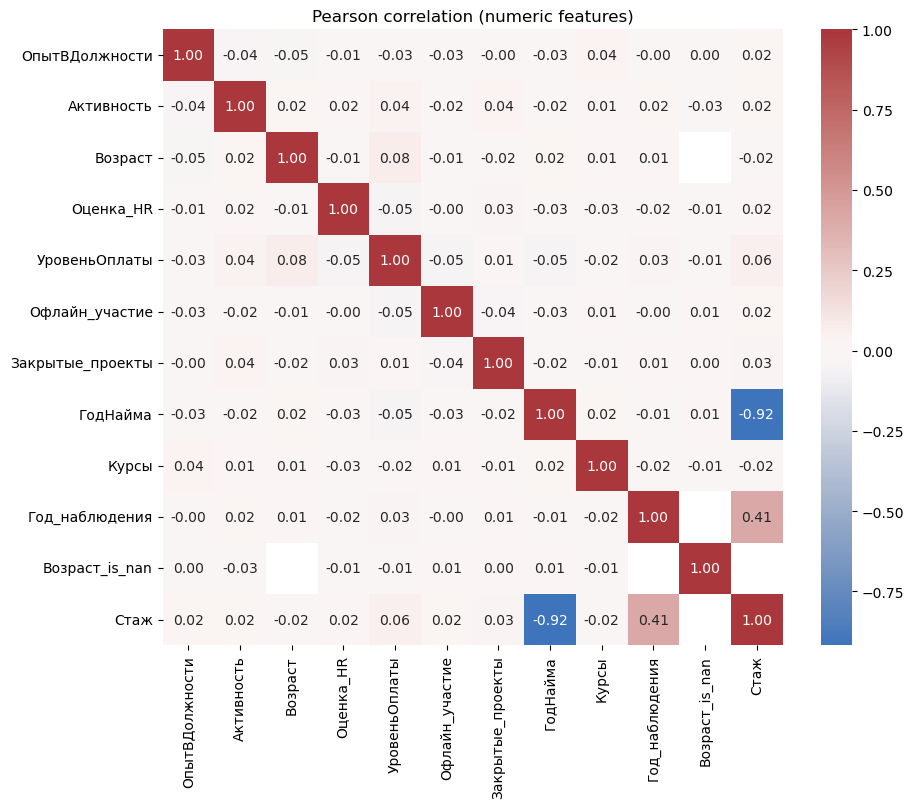

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_num = X[num_cols].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_num, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Pearson correlation (numeric features)')
plt.show()


Работа над пропусками

<Axes: >

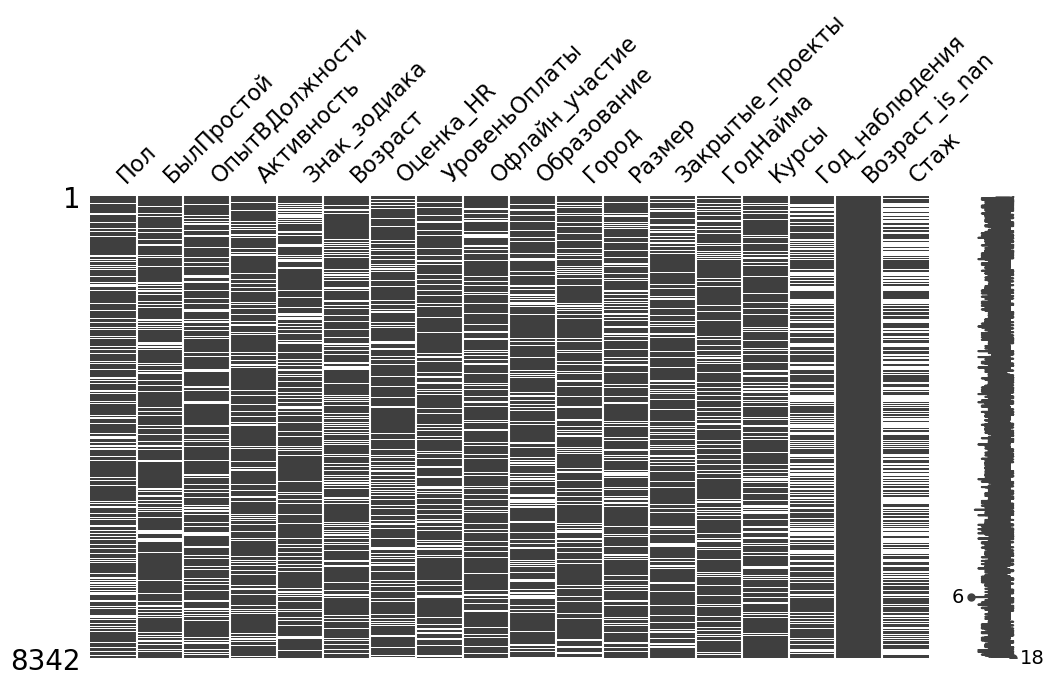

In [194]:
import missingno as msno
msno.matrix(X, figsize=(12,6)) #пропусков видно много

In [195]:
print("Пропуски в числовых:", X[num_cols].isnull().sum().sum())
print("Пропуски в категориальных:", X[cat_cols].isnull().sum().sum())

Пропуски в числовых: 22001
Пропуски в категориальных: 10039


In [ ]:
#ограничиваюсь добавлением индикаторов пропусков
#и заполнением категорий значением unknown
#так как модель нативно работает с категориальными признаками
#и устойчиво обрабатывает пропуски
def process_imputation(df):
    problem_cols = ['Оценка_HR', 'Курсы', 'Закрытые_проекты',
                    'Активность', 'ОпытВДолжности']
    
    for col in problem_cols:
        if col in df.columns:
            df[f'{col}_is_nan'] = df[col].isnull().astype(int) 

    cat_cols = df.select_dtypes(include='object').columns.tolist()
    df[cat_cols] = df[cat_cols].fillna('unknown')
    
    return df


In [197]:
X_fill = process_imputation(X.copy())
X_test_fill = process_imputation(X_test.copy())

CatBoost выбран из-за устойчивости к пропускам, способности работать с категориальными признаками напрямую и хорошей производительности на табличных данных

Предварительная визуализация и распределение признаков уже были выполнены в первом ноутбуке

In [198]:
#добавляю отсутствующие колонки из train в test
for col in X_fill.columns:
    if col not in X_test_fill.columns:
        X_test_fill[col] = 0  
X_test_fill = X_test_fill[X_fill.columns] 

In [199]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

cols_to_drop = ['Подписаны_документы', 'Телефон', 'Unnamed: 0']
X_fill = X_fill.drop(columns=cols_to_drop, errors='ignore')
X_test_fill = X_test_fill.drop(columns=cols_to_drop, errors='ignore')

def fill_missing(df): #дополнительно заполняю все оставшиеся пропуски, чтобы модель корректно обработала данные(немного увеличило скор)
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    df[num_cols] = df[num_cols].fillna(0)

    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    df[cat_cols] = df[cat_cols].fillna('unknown')
    
    return df

X_fill = fill_missing(X_fill)
X_test_fill = fill_missing(X_test_fill)

cat_features = X_fill.select_dtypes(include=['object']).columns.tolist()
for col in cat_features:
    X_fill[col] = X_fill[col].astype(str)
    X_test_fill[col] = X_test_fill[col].astype(str)

X_test_fill = X_test_fill[X_fill.columns]

#разбиваю данные на тренировочную и валидационную выборки с помощью train_test_split, 
#чтобы модель могла учиться на одной части данных и сразу проверять качество на другой
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_fill, y_train, test_size=0.2, random_state=42, stratify=y_train
)

cat_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.09,
    eval_metric='AUC',
    random_seed=42,
    cat_features=cat_features,
    verbose=200
)

cat_model.fit(
    X_train_split, y_train_split,
    eval_set=(X_val_split, y_val_split),
    early_stopping_rounds=50
)

val_pred = cat_model.predict_proba(X_val_split)[:,1]
print(f"Validation ROC-AUC: {roc_auc_score(y_val_split, val_pred):.4f}")

y_pred_cat = cat_model.predict_proba(X_test_fill)[:, 1]
submission = pd.DataFrame({'proba': y_pred_cat})
submission.to_csv('submission_cat.csv', index=False)

0:	test: 0.7342720	best: 0.7342720 (0)	total: 20.6ms	remaining: 20.6s
200:	test: 0.8532343	best: 0.8532479 (198)	total: 5.27s	remaining: 20.9s
400:	test: 0.8706227	best: 0.8706227 (400)	total: 10.3s	remaining: 15.3s
600:	test: 0.8793034	best: 0.8793034 (600)	total: 15.1s	remaining: 10s
800:	test: 0.8837900	best: 0.8839106 (770)	total: 19.9s	remaining: 4.94s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8839106358
bestIteration = 770

Shrink model to first 771 iterations.
Validation ROC-AUC: 0.8839
